# Data Scientist Associate Practical Exam Submission

## Data validation

The data contains 1500 rows and 8 columns. The majority of columns are objects. The only column which comes with missing data is web_browser. In what follows, I detail the work performed on each column of the dataset:

* owned: Same as description; do not contain missing data
* make_model: Same as description without missing data.
* review_month: Rows come with date in different formats; I unify all formats to the one suggested on the description using dateutil.parser
* web_browser: The column has 150 missings rows. I replaced them with "unknown" as suggested. After replacement, it has 7 categories included the "unknown" one.
* reviewer_age: Column comes with a "-" character. So, I first replace that character to 0, convert the data to integer, and replace the 0 values with the mean of age using both the .mask() and .fillna() methods. Finally, I ended up with 150 user with age of 30.
* primary_use: Same as description; no missing values
* value_for_money: Same as description without missing values.
* overall_rating: Sames as description without missing values.

## Importing and cleaning the information

In [85]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import numpy as np
import seaborn as sns

#Import the data
df=pd.read_csv('electric_bike_ratings_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


In [86]:
#Fix the column review_month
df['review_month'] = df['review_month'].apply(parse).dt.strftime('%b')

#Replace missings in column web_browser
df.web_browser=df.web_browser.fillna('unknown')

#Replace missing with mean in column reviewer_age
df.loc[df['reviewer_age']=='-', 'reviewer_age']='0'
df.reviewer_age=df.reviewer_age.astype(int)
df.reviewer_age=df.reviewer_age.mask(df.reviewer_age==0).fillna(df.reviewer_age.mean()).astype(int)

## Exploratory Analysis
There are more reviewers who owned a moped that those who do not: 59% against 41% respectively. The data is lightly imbalanced towards the class owners, but it means not a concern for most of ML procedures. Ergo, there shouldn't raise a problem in terms of performance. 

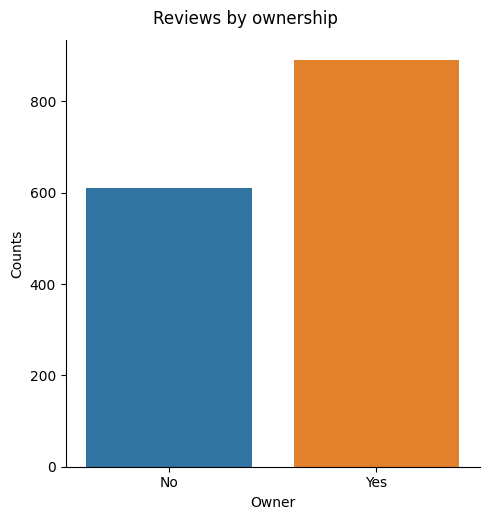

In [87]:
# Visualizing reviews by owned
g=sns.catplot(x='owned', data=df, kind='count')
g.fig.suptitle('Reviews by ownership', y=1.03)
g.set(ylabel='Counts', xlabel='Owner')
plt.xticks(
    [0, 1], 
    ["No", "Yes"]
)
plt.show()

## Task 3
The distribution of overall ratings is widely dispersed . Its noticeable though that the majority of ratings given to the motorcylce concentrates between 18 and 20. 

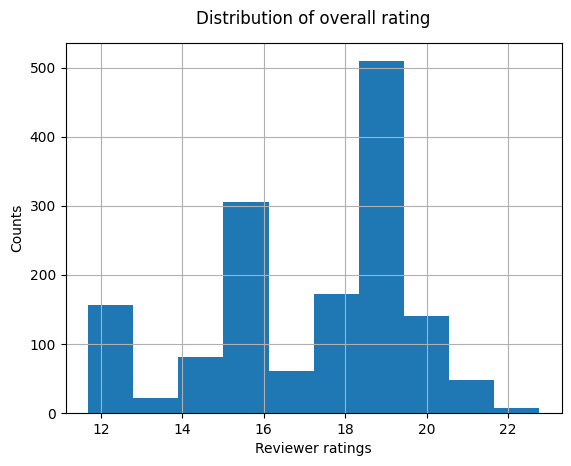

In [88]:
# Graphing the histogram
df.overall_rating.hist()
_=plt.title('Distribution of overall rating', y=1.03)
_=plt.xlabel('Reviewer ratings')
_=plt.ylabel('Counts')
plt.show()

## Relationship between ownership and overall rating
From the graph below one can see that owners give better ratings than no owners. The median of ratings is quite superior for owners compared to no owners. Furthermore the ratings given by no owners is pretty dispersed and it covers almost the entirely distribution of responses.

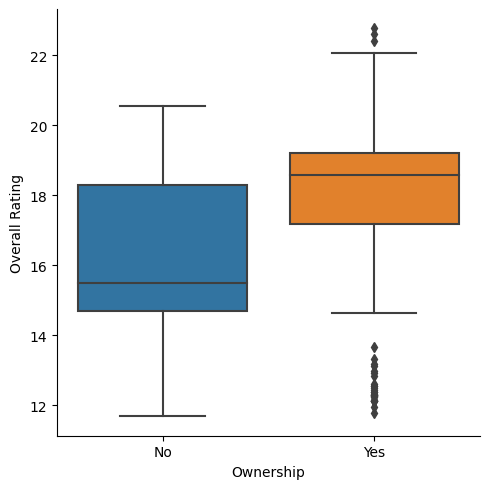

In [90]:
#Creating a boxplot
g=sns.catplot(x='owned', y='overall_rating', data=df, kind='box')
g.set(ylabel='Overall Rating', xlabel='Ownership')
plt.xticks(
    [0, 1], 
    ["No", "Yes"]
)
plt.show()

## The model
This is a classification problem. Given that we have the classes and the features, we can make predictions as to whether a review comes from an owner or not. Here, our target variable is the column "owned".

## Some additional work on the data

Logistic Regression and Decision Tree models work fairly well with numeric data. In our database however, we have a mix of numeric with non-numeric data that we need to deal with before fitting the model. First. let's take another look to the data. In this case the columns make_model, review_month, web_browser, primary_use an valu_for_monety all need to be converted into numeric columns. I make the convertion using one-hot encoding with the .get_dummies() method on the object columns.

In [91]:
df.head(10)

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5/10,12.29
5,0,Lunna-Eyden,Aug,IE,47,Commuting,5/10,15.28
6,0,Lunna-Keetra,Mar,Chrome,20,Leisure,3/10,12.28
7,1,Nielah-Keetra,Mar,Chrome,32,Commuting,7/10,15.92
8,1,Nielah-Eyden,Mar,Chrome,35,Commuting,4/10,19.39
9,1,Nielah-Eyden,Jul,Firefox,22,Commuting,6/10,18.38


In [92]:
#One-hot encoding
# Create two data sets for numeric and non-numeric data
df_num = df.select_dtypes(exclude=['object'])
df_str = df.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
df_str_onehot = pd.get_dummies(df_str)

# Union the one-hot encoded columns to the numeric ones
df_prep = pd.concat([df_num, df_str_onehot], axis=1)

# Print the columns in the new data set
print(df_prep.columns)

Index(['owned', 'reviewer_age', 'overall_rating', 'make_model_Hoang-Eyden',
       'make_model_Hoang-Keetra', 'make_model_Lunna-Eyden',
       'make_model_Lunna-Keetra', 'make_model_Nielah-Eyden',
       'make_model_Nielah-Keetra', 'review_month_Apr', 'review_month_Aug',
       'review_month_Dec', 'review_month_Feb', 'review_month_Jan',
       'review_month_Jul', 'review_month_Jun', 'review_month_Mar',
       'review_month_May', 'review_month_Nov', 'review_month_Oct',
       'review_month_Sep', 'web_browser_Android', 'web_browser_Chrome',
       'web_browser_Firefox', 'web_browser_IE', 'web_browser_Opera',
       'web_browser_Safari', 'web_browser_unknown', 'primary_use_Commuting',
       'primary_use_Leisure', 'value_for_money_1/10', 'value_for_money_10/10',
       'value_for_money_2/10', 'value_for_money_3/10', 'value_for_money_4/10',
       'value_for_money_5/10', 'value_for_money_6/10', 'value_for_money_7/10',
       'value_for_money_8/10', 'value_for_money_9/10'],
      dtype='obj

In [93]:
df_prep.head()

,owned,reviewer_age,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Apr,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,review_month_May,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure,value_for_money_1/10,value_for_money_10/10,value_for_money_2/10,value_for_money_3/10,value_for_money_4/10,value_for_money_5/10,value_for_money_6/10,value_for_money_7/10,value_for_money_8/10,value_for_money_9/10
0,1,23,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,24,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,0,28,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,41,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,33,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Fitting the models

First, I separate the target column, "owned", from the rest of the columns in the data to create the train and test sets. First, I use the 60% of the data for training and the rest for testing the model. I declare a random state of 66. Furthermore, I use np.ravel() from numpy to work with a numpy array instead of a pandas dataframe

In [94]:
#Importing the libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

## Fitting the baseline model: Logistic Regression

In [95]:
# Create the X and y data sets
X = df_prep.drop(columns='owned', axis=1)
y = df_prep[['owned']]

#Create training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=66)

#Instantiate the model
rev_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [96]:
# Calculating predictions
preds = rev_logistic.predict_proba(X_test)

# Create data to compare the predictions against the true values
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   owned  prob_default
0      0      0.598211
1      0      0.400848
2      0      0.565040
3      0      0.429948
4      0      0.651025


## Fitting the comparison model: Gradient Boosted Trees

In [97]:
#Fitting the model
rev_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Make predictions
gbt_preds = rev_gbt.predict_proba(X_test)

# Create data to compare the predictions against the true values
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1).round(3))

   owned  prob_default
0      0         0.748
1      0         0.334
2      0         0.119
3      0         0.098
4      0         0.849


# A quick check
At first view one can see that the predictions aren't the same. XGBoost is accurately predicting that some reviews actually do not come from owners. 

## A brief explanation on the why I use these two models

In this case I use a Logistic Regression Model as a baseline model. It is simple and widely used model for tackling classification issues. Furthermore it is easy to interpret and efficient to run. As a comparison Decision Tree Model; in particular is use Gradient Boosted Trees, so I can control for possible missclassifications. This richness of the model comes fro the fact it uses several small trees to tackle the problem at hando. Also, it is quite efficient to address binary problems like the one I have here.

## How these two models performed?

I build a classification report to look for two indicators: precision and recall. I also calculate the area under of curve for both of the model to which gives an idea of how well my model is compared to a random model. Here I use the .predict() to obtain the values of 0 or 1 of the column "owned"

In [98]:
#Accuracy

 #Logistic
print(rev_logistic.score(X_test, y_test))

 #XGBoost
print(rev_gbt.score(X_test, y_test))


0.725
0.685


In [99]:
#Classification reports

 # Predict the ownership using each model
rev_preds_prob = rev_logistic.predict(X_test)
gbt_preds_prob= rev_gbt.predict(X_test)

 # Print the classification report of the Logistic Regression Model
target_names = ['No owner', 'Owner']

print(classification_report(y_test, rev_preds_prob, target_names=target_names))

# Print the classification report of the Gradient Boosted Tree model
print(classification_report(y_test, gbt_preds_prob, target_names=target_names))

              precision    recall  f1-score   support

    No owner       0.73      0.58      0.65       260
       Owner       0.72      0.84      0.77       340

    accuracy                           0.73       600
   macro avg       0.73      0.71      0.71       600
weighted avg       0.73      0.72      0.72       600

              precision    recall  f1-score   support

    No owner       0.67      0.55      0.60       260
       Owner       0.70      0.79      0.74       340

    accuracy                           0.69       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.68      0.69      0.68       600



In [100]:
# Calculating AUC

 #Logistic
prob_default_log = preds[:, 1]
auc_logistic=roc_auc_score(y_test, prob_default_log)


 #XGBoost
prob_default_gbt = gbt_preds[:, 1]
auc_gbt=roc_auc_score(y_test, prob_default_gbt)

print(auc_logistic, auc_gbt)

0.8044457013574661 0.7688235294117648


## Is there a winner?

At comparing the both models and the performance of each using the four metrics: accuracy, precison, recall and auc. Thus, one can conclude that the Logistic Regression setup performs better on this dataset than the XGboost model. So I would be inclined to use Logistic Regression, which is easier to interpret and less complex than the Decision Tree model, to predict the type of ownership coming from a review. However, the differences are small. Why is this the case? Well, there is a class imbalance issue; albeit lightly, it might be creating a problem for the XGBoost algorithm to corectly minimize the log loss.